# Symbolic Quantum Computing

## Imports

In [1]:
%matplotlib inline

In [2]:
from IPython.display import display

In [3]:
from sympy import init_printing
init_printing(use_latex=True)

In [4]:
from sympy import sqrt, symbols, Rational
from sympy import expand, Eq, Symbol, simplify, exp, sin, srepr
from sympy.physics.quantum import *
from sympy.physics.quantum.qubit import *
from sympy.physics.quantum.gate import *
from sympy.physics.quantum.grover import *
from sympy.physics.quantum.qft import QFT, IQFT, Fourier
from sympy.physics.quantum.circuitplot import circuit_plot

## Qubits

In [5]:
alpha, beta = symbols('alpha beta', real=True)

In [6]:
psi = alpha*Qubit('00') + beta*Qubit('11'); psi

In [7]:
Dagger(psi)

In [8]:
qapply(Dagger(Qubit('00'))*psi)

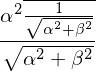

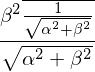

In [9]:
for state, prob in measure_all(psi):
    display(state)
    display(prob)

Qubits can be represented in the computational basis.

In [10]:
represent(psi)

## Gates

Gate objects are the operators which act on a quantum state.

In [11]:
g = X(0)
g

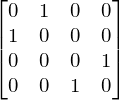

In [12]:
represent(g, nqubits=2)

In [13]:
c = H(0)*Qubit('00')
c

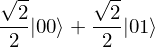

In [14]:
qapply(c)

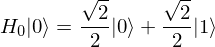

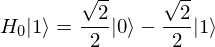

In [15]:
for gate in [H,X,Y,Z,S,T]:
    for state in [Qubit('0'),Qubit('1')]:
        lhs = gate(0)*state
        rhs = qapply(lhs)
        display(Eq(lhs,rhs))

<h2>Symbolic gate rules and circuit simplification</h2>

In [16]:
for g1 in (Y,Z,H):
    for g2 in (Y,Z,H):
        e = Commutator(g1(0),g2(0))
        if g1 != g2:
            display(Eq(e,e.doit()))

In [17]:
c = H(0)*X(1)*H(0)**2*CNOT(0,1)*X(1)**3*X(0)*Z(1)**2
c

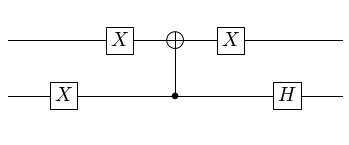

In [19]:
circuit_plot(c, nqubits=2);

This performs a commutator/anticommutator aware bubble sort algorithm to simplify a circuit:

In [20]:
gate_simp(c)

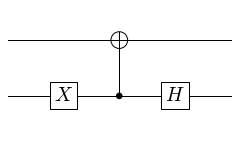

In [21]:
circuit_plot(gate_simp(c),nqubits=2)